In [1]:
import tensorflow as tf
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import numpy as np
import matplotlib.pyplot as plt
## Building a deep neural network
def build_model(units, input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units, activation='sigmoid', use_bias=True, bias_initializer='zeros', input_shape=(input_dim,)),
        tf.keras.layers.Dense(units=units-1, activation='relu')])
    return model

model = build_model(3,2)
model_output= model(tf.constant([[1,2.]], shape=(1,2))).numpy()
print(model_output)

2024-07-25 22:43:06.003251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

tf.Tensor(56.0, shape=(), dtype=float32)
Initializing x=[0.6958504]


/Users/trannhi/Library/Python/3.9/lib/python/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0, 0.5, 'p value')

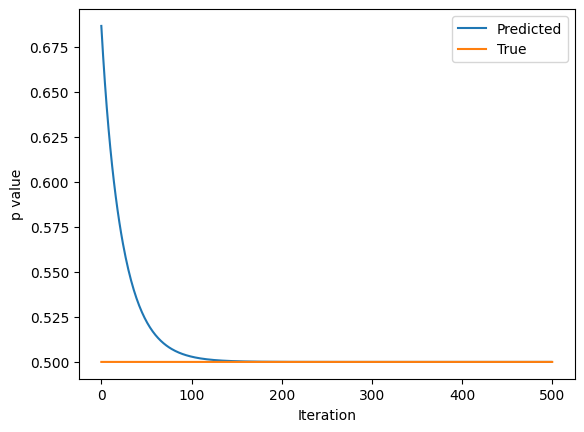

In [3]:
## Computing loss

# Gradient Descent

x= tf.Variable(4.0)

with tf.GradientTape() as tape:
    y = x**3 + x**2
    
dy_dx = tape.gradient(y, x)

print(dy_dx)

p = tf.Variable(tf.random.uniform([1], minval=0, maxval=1))
print("Initializing x={}".format(p.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []

y = 0.5

for i in range(500):
    with tf.GradientTape() as tape:
        loss = - (y * tf.math.log(p) + (1 - y) * tf.math.log(1 - p))
    grad = tape.gradient(loss, p)
    new_p = p - learning_rate*grad
    p.assign(new_p)
    history.append(p.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[y,p])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('p value')